### PRELECTURE HOMEWORK WEEK 04

#### pre-lecture homework question 1: 

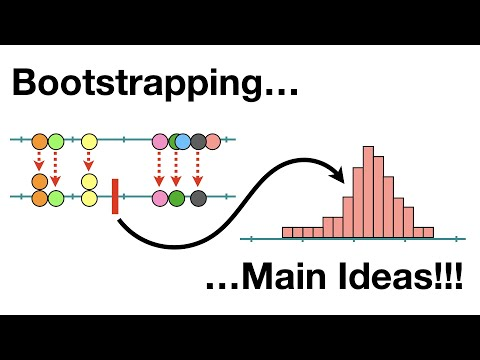

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)


Lets first start by defining the term standard deviation. Standard deviation is the calculation of how far different individual data points are from the average, or the mean. It assess the dispersion of different individual data points across an entire set of data points for a population or a sample. To visualize; Standard deviation essentially tells us how wide the graph is as it calculates how far away/spread apart different data points are from the middle (mean) of the graph. Standard error of mean on the other hand is used to measure percision, and less about showing us the entire picture of the graph. As it says in the title standard error of the mean focus' on looking at the mean more than the entire sample/population. When calculated the standard error of the mean we are looking at all of the sample means calculated from bootstrapping and seeing how far the deviate from the actual population mean in our original data set. Furthermore, since standard error of mean is calculating percision, whereas standard deviation is not, the sample size can change your outcome; as more data from a bigger sample size can lead to a smaller error meaning that your outcome is more percise. In the end, standard deviation captures the idea of the shape of your data/graph whereas standard error of mean captures the idea of how percise your bootstrapping/estimation of data are. 

#### post-lecture homework question 6: 


i) the process of bootstrapping is essentially the process of repitiion. We would essentially take different data points from a number line, and create multiple new number lines by choosing random data points from the original, mosst of the time it will take repeating data points so that we have the same amount of data points as the original. This process repeats many many many times. Once it creates all these new number lines it will calculate the mean of all of these new number lines, and plot it into a graph that shows us bars, each representing a different mean, showing us how often a certain mean would pop up in our repitive loop of calculating means for different number lines.

ii) the purpose of boothstrapping is to help us see how accurate our sample data is, by doing a repititive practice we can use our results to show us where they may be different errors, or to help us understand more about our intial data set.

iii) Since bootstrapping shows us the different means of a bunch of different samples, we can look at a graph of the different sample populations from mixing around data points, the graph we get from bootstrapping can show us the frequency that a certain number pops up from its repitive calculations, and we can look to see if our hypothesis aligns with any of the frequent numbers that appear.

#### post-lecture homework question 8

In [4]:
import pandas as pd

df = pd.read_csv('Alitech_Patient_Data.csv')
print(df)

   Patient ID  Age Gender  IntialHealthScore  FinalHealthScore
0           1   45      M                 84                86
1           2   34      F                 78                86
2           3   29      M                 83                80
3           4   52      F                 81                86
4           5   37      M                 81                84
5           6   41      F                 80                86
6           7   33      M                 79                86
7           8   48      F                 85                82
8           9   26      M                 76                83
9          10   39      F                 83                84


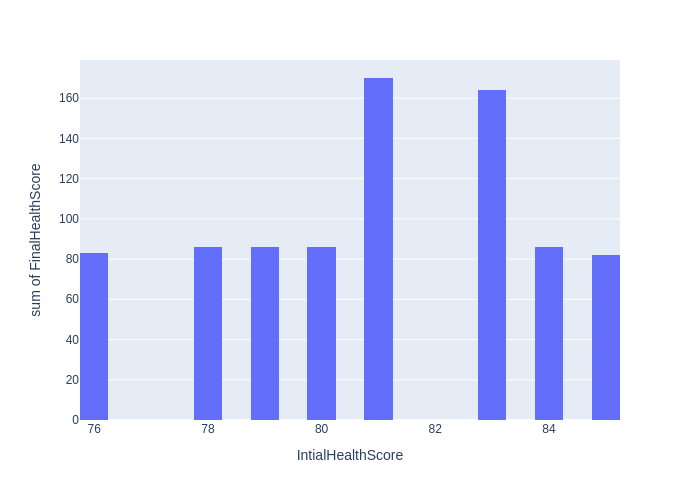

In [14]:
import plotly.express as px
fig = px.histogram(df, nbins = 20, x="IntialHealthScore", y="FinalHealthScore")
fig.show(renderer='png')

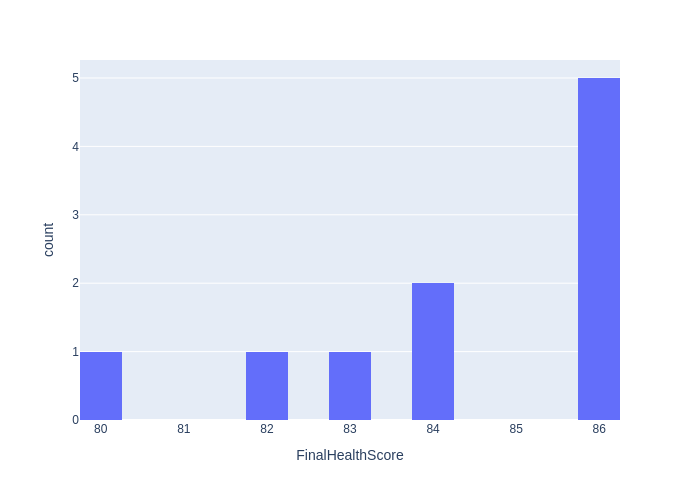

In [19]:
import plotly.express as px
fig = px.histogram(df, nbins = 20, x="FinalHealthScore")
fig.show(renderer='png')

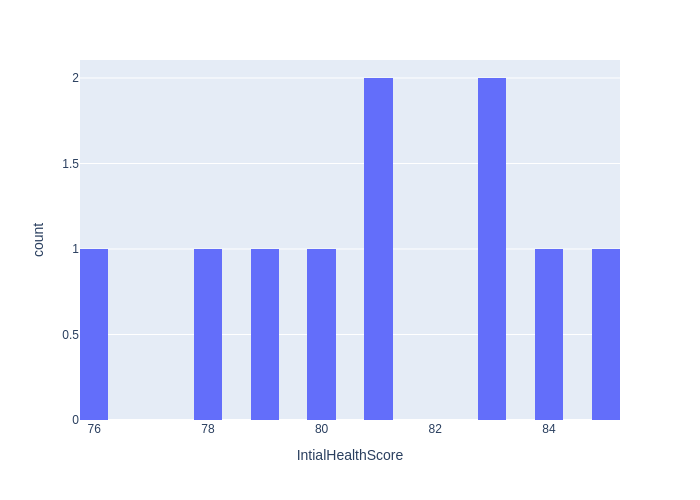

In [37]:
import plotly.express as px
fig = px.histogram(df, nbins = 20, x="IntialHealthScore")
fig.show(renderer='png')

In our case, a null hypothesis would show that there is 0 difference from the intial health score to the final healthscore, meaning that the drug is not going anything. From looking at the histograms just using the initial data we can see that the mean of the inital health scors and the final healthscores barely changes, as it goes from around 81 to 86, we can use bootstrapping to recalculate the mean of the final healthscores to see if this change is legitimate or not

In [20]:
import numpy as np
import pandas as pd

n_iterations = 1000
n_size = len(df)

bootstrapped_means = []


for i in range(n_iterations):
    boot_sample = df.sample(n=n_size, replace=True)
    
    # Calculate the mean of the resampled data
    boot_mean = boot_sample['FinalHealthScore'].mean()
    
    # Append the mean to the list of bootstrapped means
    bootstrapped_means.append(boot_mean)

# Convert to a numpy array for further analysis
bootstrapped_means = np.array(bootstrapped_means)

# Calculate the 95% confidence interval
ci_lower = np.percentile(bootstrapped_means, 2.5)
ci_upper = np.percentile(bootstrapped_means, 97.5)

# Output the results
print(f"Bootstrapped Mean Estimate: {np.mean(bootstrapped_means):.2f}")
print(f"95% Confidence Interval: [{ci_lower:.2f}, {ci_upper:.2f}]")


Bootstrapped Mean Estimate: 84.32
95% Confidence Interval: [83.00, 85.60]


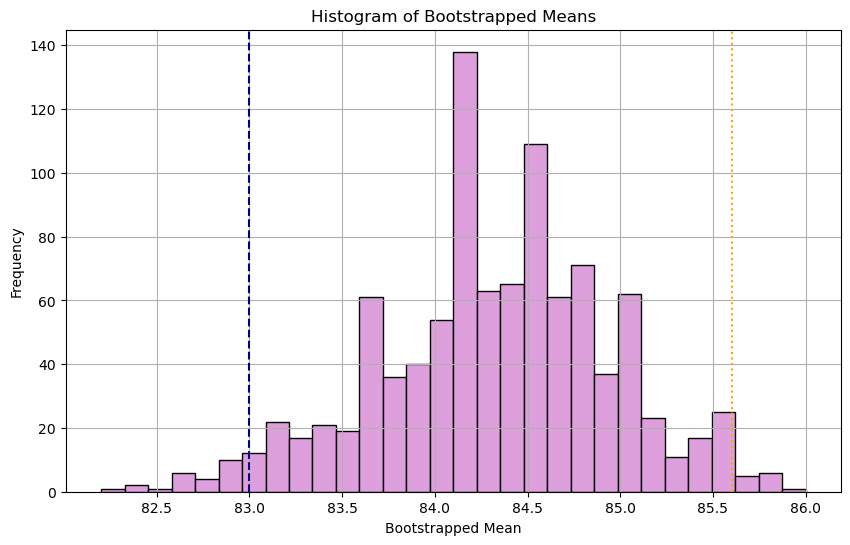

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(bootstrapped_means, bins=30, color='plum', edgecolor='black')
plt.axvline(ci_lower, color='navy', linestyle='--', label=f'Lower 95% CI: {ci_lower:.2f}')
plt.axvline(ci_upper, color='orange', linestyle=':', label=f'Upper 95% CI: {ci_upper:.2f}')
plt.title('Histogram of Bootstrapped Means')
plt.xlabel('Bootstrapped Mean')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

This histrogram shows the results of our bootstrapped data. This is essentially showing us if we run through the experiment of giving out the vaccine a thousand times, what mean of final health would we get. It clearly shows there does in fact to be a change in the mean of the health scores, even on the lower end of the 95% confidence interval, although it only goes from 81 to 83, the difference still occurs. Since in the 95% confidence interval we can see a change in the mean, it means we do not have a null hypothesis. 

#### Chat Bot Summary: 
Statistical Concepts Discussion:

You shared an explanation you wrote about the difference between the standard error of the mean and standard deviation. We refined your answer to clarify that:
Standard deviation measures the dispersion of individual data points from the mean.
Standard error of the mean focuses on the precision of the sample mean estimate and decreases with larger sample sizes.
We discussed how bootstrapping works: resampling with replacement from a dataset to estimate the variability of a statistic (such as the mean) and calculate confidence intervals.
Coding Issues:

You encountered an error while loading a dataset (FileNotFoundError: 'Alitech_Patient_Data.csv'), and we discussed how to handle that error by ensuring the file path is correct.
Bootstrapping in Python:

I walked you through a Python example of how to bootstrap the mean of a dataset and explained how to calculate the 95% confidence interval from the bootstrapped means.
Visualizing Bootstrapped Results:

I showed you how to create a histogram of your bootstrapped means using matplotlib and seaborn.
We then discussed how to add vertical lines representing the 95% confidence interval onto your histogram using plt.axvline().
This interaction provided you with code examples and concepts related to hypothesis testing, bootstrapping, and data visualization. Let me know if you need further clarifications or additions!


### LINK: https://chatgpt.com/share/66ff6692-1214-800f-8d5d-df4133c9d084